# Arboles de desición
Proporcionan una represetancion grafica del proceso de desiscion secuencial

- Puntos de desición y alternativas








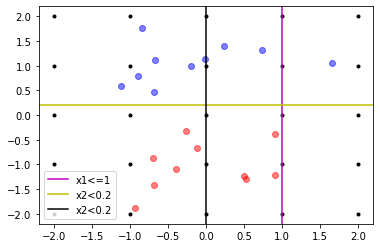

In [ ]:
#https://www.codificandobits.com/blog/clasificacion-arboles-decision-algoritmo-cart/
from sklearn.datasets import make_classification
X0, y0 = make_classification(n_samples=20,
    n_features=2, n_redundant=0, n_informative=1, random_state=1, 
    n_clusters_per_class=1)

x=np.arange(-2, 3,1)
x_,y_ = np.meshgrid(x,x)

fig, ax = plt.subplots()

ax.plot(X0[:,0][y0==0],X0[:,1][y0==0],"ro", alpha=0.5)
ax.plot(X0[:,0][y0==1],X0[:,1][y0==1],"bo", alpha=0.5)
ax.plot(x_,y_,"k.")

ax.axvline(x = 1, color = 'm', label="x1<=1")
ax.axhline(y = 0.2, color = 'y', label="x2<0.2")
ax.axvline(x = 0.0, color = 'k', label="x2<0.2")

plt.legend(loc=3)

- ref https://www.youtube.com/watch?v=kqaLlte6P6o&ab_channel=CodificandoBits
- Hand on Machine leargning 
- Gini index


$G=1- (PC 1)^2-(PC 2)^2$



-Si se tiene puntos perteniecientes a una clase despues de trazar la primera se tienen nodos puros. $G=0$
Datos de una sola categoria

- Gini > 0 son datos con impurezas

La particion purpura  y amarilla del grafico anterior represetan nodos puros.


Mientras que la linea negra define:
Si :
$G=1-(7/12)^{2}-(5/12)^{2}$

mientras que la ponderacion viene dada por:
m = (7/20+6/20)



No:

$G=1-(3/7)^{2}-(4/7)^{2}$
m = (3/20+4/20)


La funcion de coste, asocida al nodo padre:

$J(k, t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right} $



Entropía de Gini.


$H=-\sum_{k=1\\ p_{ik!=0}}^{n} p_{ij}\log_2(p_{ik})$

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
import graphviz
#from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree


# Libraries for draw contours
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_contoursExact(ax, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,\
                                                    test_size=0.33, random_state=42)

In [ ]:
DecisionTreeClassifier?

In [ ]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

print(f"{clf.score(X_test, y_test)} ")
print(f"{clf.score(X_train, y_train)}" )

0.98 
0.95


In [ ]:
tree.export_graphviz?
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html


In [ ]:
# save graph, put out_file with the name
arbol = tree.export_graphviz(clf, out_file=None, 
                     class_names = iris.target_names,\
                    feature_names = iris.feature_names,\
                    impurity=False, filled=True)
!ls

sample_data


In [ ]:
tree.plot_tree?

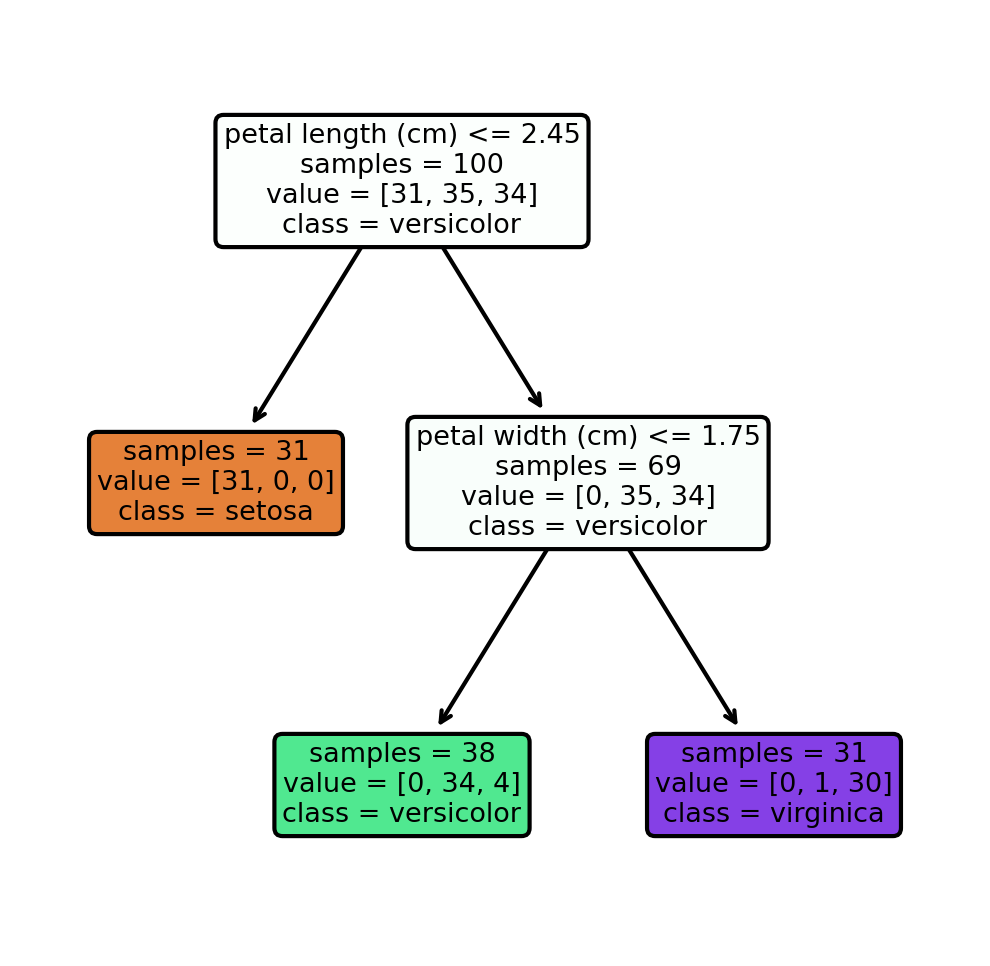

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
graph=tree.plot_tree(clf,class_names = iris.target_names,\
              feature_names = iris.feature_names,\
              impurity=False, filled=True,rounded=True )

# Importancia de las cacracteristicas

In [ ]:
clf.feature_importances_

array([0.        , 0.        , 0.55816894, 0.44183106])

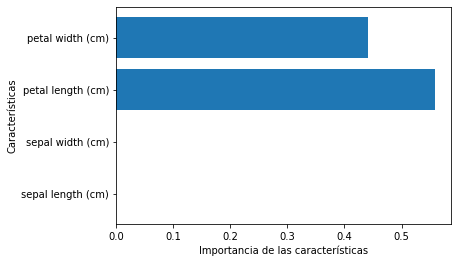

In [ ]:
caract = iris.data.shape[1]
plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()

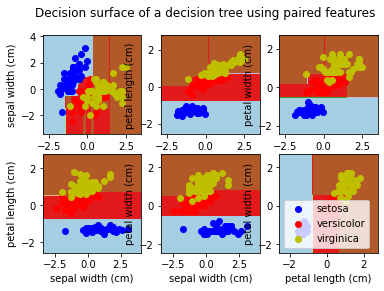

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()